In [1]:
import random
import os
import pickle
import matplotlib.pyplot as plt
import cv2
import numpy as np

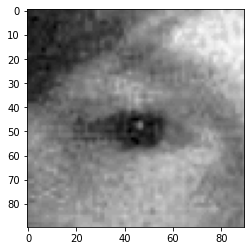

In [2]:
img_array = cv2.imread('train/open_eyes/s0003_00607_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
_ = plt.imshow(img_array,cmap='gray')

In [3]:
img_array.shape

(90, 90)

#### rescaling the image as mobilenet require (224,224,3) size

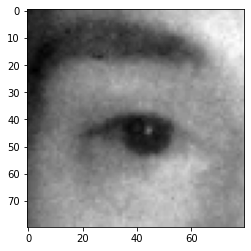

In [4]:
DataDirectory = 'train/' #training data
Classes = ['closed_eyes','open_eyes'] #list of classes
for category in Classes:
    path = os.path.join(DataDirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2BGR)
        plt.imshow(img_array , cmap='gray')
        break
        

In [5]:
img_size = 224
type(img_array)

numpy.ndarray

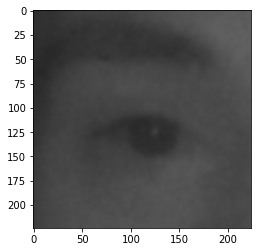

numpy.ndarray

In [6]:
new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array , cmap='gray')
plt.show()
type(new_array)

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataDirectory , category)
        class_num = Classes.index(category) # 0 or 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb ,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

9795


In [10]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1, img_size,img_size,3)
X=X/255.0 #normalizing the data
y = np.array(y)

In [11]:
X.shape,y.shape

((9795, 224, 224, 3), (9795,))

### saving the data

In [12]:
pickle_out = open('X2.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open('y2.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [13]:
print('saved')

saved
